In [1]:
#Upload Authorization Table Data, because this data set is LARGE, this will need to be streamed.

#import json
#import base64
#import requests

#DOMAIN = '<databricks-instance>'
#TOKEN = '<your-token>'
#BASE_URL = 'https://%s/api/2.0/dbfs/' % (DOMAIN)

#def dbfs_rpc(action, body):
#    """ A helper function to make the DBFS API request, request/response is encoded/decoded as JSON """
 #   response = requests.post(
#        BASE_URL + action,
#       headers={"Authorization": "Basic " + base64.standard_b64encode("token:" + TOKEN)},
 #       json=body
#    )
#    return response.json()

# Create a handle that will be used to add blocks
#handle = dbfs_rpc("create", {"path": "/temp/upload_large_file", "overwrite": "true"})['handle']
#with open('/a/local/file') as f:
#    while True:
        # A block can be at most 1MB
#        block = f.read(1 << 20)
#        if not block:
#            break
#        data = base64.standard_b64encode(block)
#        dbfs_rpc("add-block", {"handle": handle, "data": data})
# close the handle to finish uploading
#dbfs_rpc("close", {"handle": handle})

In [2]:
# The above code is meant for a large data sample, pretend that the large auth.txt file was actually loaded and that all permissions between aws and datablocks worked this is the sample code for machine learning down below. There are 3 different types of binary classifiers that were used, all are supervised learning methods. First is Logistic Regression, Second is Decision Tree, third is Random Forest using 10 trees. Using all of these models will show the eventual best model for the data I have. I did also consider a KMeans clustering algorithm, which is an unsupervised learning algorithm, but I preferrred the more hands on approach for the data I have. 

#A little explantaion of the data: The data is authorization logs from a windows based system. It is public data from Los Alamos National Labs. Source User Domain and Destination User Domain are the domain names of the Source Computer and Destination Computer. Authentication type; according to itprotoday.com in "comparing-windows-kerberos-and-ntlm-authentication-protocols", "NTLM is a challenge/response-based authentication protocol that is the default authentication protocol of Windows NT 4.0 and earlier Windows versions" Kerberos at this point in time is the default authentication protocol for Windows 200 and above.Negotiate is Kerberos under Internet Explorer(source: https://www.itprotoday.com/security/comparing-windows-kerberos-and-ntlm-authentication-protocols.) log on type is Network, Service,Batch, ? , Interactive, Network Cleartext, and New Credentials, Authentication Orientation talks about Logging On or Logging Off. SuccessorFail is dealing with if the Authorization Suceeded or failed.

#I did not get rid of rows with ? for a reason. Because I noticed that most of the Failures came from ? data. ?s should not be deleted. 

In [3]:
##Load Data

In [4]:
from pyspark.sql import functions as sf

# File location and type
file_location = "/FileStore/tables/newsample.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)


Time,SourceUserDomain,DestinationUserDomain,SourceComputer,DestinationComputer,AuthenticationType,LogonType,AuthenticationOrientation,SuccessFailure
1,C1727$@DOM1,C1727$@DOM1,C1727,C1881,Kerberos,Network,LogOn,Success
1,C567$@DOM1,C567$@DOM1,C101,C101,?,Network,LogOff,Success
1,U129@DOM1,U129@DOM1,C419,C419,?,Network,LogOff,Success
1,U26@DOM1,U26@DOM1,C1730,U26,?,?,TGS,Success
1,U6@DOM1,U6@DOM1,C61,C61,?,Network,LogOff,Success
1,U90@DOM1,U90@DOM1,C1786,C1786,?,?,TGT,Success
2,C1102$@DOM1,SYSTEM@C1102,C1102,C1102,Negotiate,Service,LogOn,Success
2,C1272$@DOM1,SYSTEM@C1272,C1272,C1272,Negotiate,Service,LogOn,Success
2,C1450$@DOM1,SYSTEM@C1450,C1450,C1450,Negotiate,Service,LogOn,Success
2,C1767$@DOM1,C1767$@DOM1,C1767,C1767,?,?,TGS,Success


In [5]:
# Create a view or table

temp_table_name = "auth_sample"

df.createOrReplaceTempView(temp_table_name)

In [6]:
%sql

/* Query the created temp table in a SQL cell */

select * from `auth_sample`

Time,SourceUserDomain,DestinationUserDomain,SourceComputer,DestinationComputer,AuthenticationType,LogonType,AuthenticationOrientation,SuccessFailure
1,C1727$@DOM1,C1727$@DOM1,C1727,C1881,Kerberos,Network,LogOn,Success
1,C567$@DOM1,C567$@DOM1,C101,C101,?,Network,LogOff,Success
1,U129@DOM1,U129@DOM1,C419,C419,?,Network,LogOff,Success
1,U26@DOM1,U26@DOM1,C1730,U26,?,?,TGS,Success
1,U6@DOM1,U6@DOM1,C61,C61,?,Network,LogOff,Success
1,U90@DOM1,U90@DOM1,C1786,C1786,?,?,TGT,Success
2,C1102$@DOM1,SYSTEM@C1102,C1102,C1102,Negotiate,Service,LogOn,Success
2,C1272$@DOM1,SYSTEM@C1272,C1272,C1272,Negotiate,Service,LogOn,Success
2,C1450$@DOM1,SYSTEM@C1450,C1450,C1450,Negotiate,Service,LogOn,Success
2,C1767$@DOM1,C1767$@DOM1,C1767,C1767,?,?,TGS,Success


In [7]:
dataset = spark.table("auth_sample")
cols = dataset.columns

In [8]:
# Filtering the successfailure column by fail and success and creating my own dataframes to explore failures further
failDF = df.filter(df.SuccessFailure == "Fail")
successDF = df.filter(df.SuccessFailure == "Success")
display(failDF)

Time,SourceUserDomain,DestinationUserDomain,SourceComputer,DestinationComputer,AuthenticationType,LogonType,AuthenticationOrientation,SuccessFailure
51,C2653$@DOM1,C2653$@DOM1,C2653,C2653,?,?,TGT,Fail
149,U22@DOM1,U22@DOM1,C246,U22,?,?,TGS,Fail
199,C1114$@DOM1,C1114$@DOM1,C1115,C1114,?,?,TGS,Fail
205,C2480$@DOM1,C2480$@DOM1,C2479,C2479,MICROSOFT_AUTHENTICATION_PACKAGE_V1_0,Network,LogOn,Fail
288,U22@DOM1,U22@DOM1,C849,U22,?,?,TGS,Fail
308,U73@DOM1,U73@DOM1,C1692,C1692,Negotiate,Batch,LogOn,Fail
324,U633@C3227,U633@C3227,C3227,C529,NTLM,Network,LogOn,Fail
345,C2653$@DOM1,C2653$@DOM1,C2653,C2653,?,?,TGT,Fail
348,U22@DOM1,U22@DOM1,C506,U22,?,?,TGS,Fail
477,C1869$@?,C1869$@?,C529,C529,?,?,TGT,Fail


In [9]:
fail_count = failDF.count()
success_count = successDF.count()
total_count= df.count()
total_count

Out[ 79 ]: 26285761

In [10]:
fail_count

Out[ 70 ]: 320056

In [11]:
success_count

Out[ 71 ]: 25965705

In [12]:
## Originally, I had divided total count and amount of failures and found failures to be about 1% of the data in the whole sample. To get a good visual on what this looks like, see the graph below.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
# Create an array that contains the number of users each language has

users = [fail_count, success_count]
x_axis = np.arange(len(users))

# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
fig, ax = plt.subplots()
ax.bar(x_axis, users)
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
ax.set_xticks(tick_locations, ["Failures", "Successes"])
# Sets the x limits of the current chart
ax.set_xlim(-0.25, len(x_axis))
# Sets the y limits of the current chart
ax.set_ylim(0, max(users)+5000)
# Give our chart some labels and a tile
ax.set_title("Authorization Successes or Failures in Data")
ax.set_xlabel("Failures: _______ Successes")
ax.set_ylabel("Number of Authorization")


Out[ 68 ]: <matplotlib.text.Text at 0x7fa5d204d590>

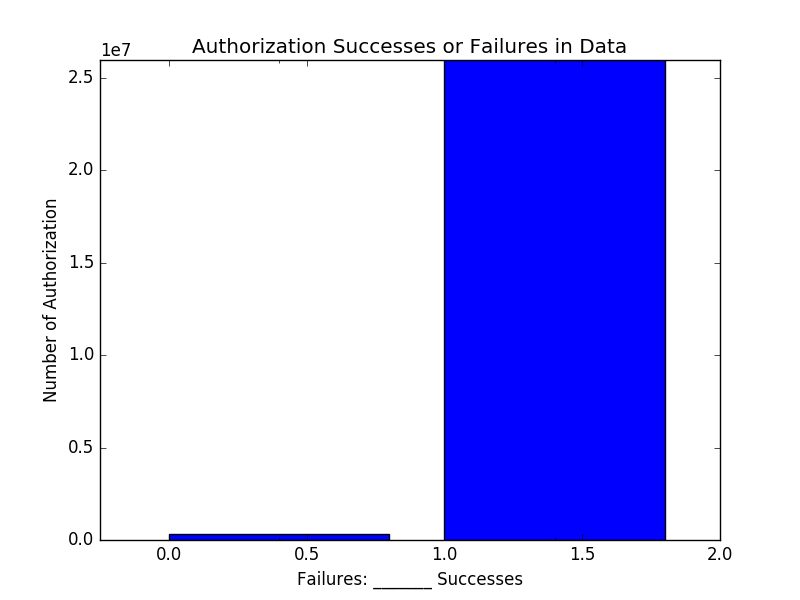

In [14]:
display(fig)

In [15]:
# I made this a permanent table in order to make sharing available, in case someone wants to run everything over I have commented out the bottom line so that there is no error, since I already have the permanent table from the code below

permanent_table_name = "auth_sample"

#df.write.format("parquet").saveAsTable(permanent_table_name)

In [16]:
##Let's play with some Machine Learning Algorithms
#First up we will have to change a few things on our data set to make it programmable for Machine Learning purposes

In [17]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
categoricalColumns = ["SourceUserDomain", "DestinationUserDomain", "SourceComputer", "DestinationComputer", "AuthenticationType", "LogonType", "AuthenticationOrientation"]
stages = [] # stages in our Pipeline
for categoricalCol in categoricalColumns:
    # Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    # Use OneHotEncoder to convert categorical variables into binary SparseVectors
    # encoder = OneHotEncoderEstimator(inputCol=categoricalCol + "Index", outputCol=categoricalCol + "classVec")
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    # Add stages.  These are not run here, but will run all at once later on.
    stages += [stringIndexer, encoder]

In [18]:
# Convert label into label indices using the StringIndexer
label_stringIdx = StringIndexer(inputCol="SuccessFailure", outputCol="label")
stages += [label_stringIdx]

In [19]:
# Transform all features into a vector using VectorAssembler
numericCols = ["Time"]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [20]:
# Create a Pipeline.
pipeline = Pipeline(stages=stages)
# Run the feature transformations.
#  - fit() computes feature statistics as needed.
#  - transform() actually transforms the features.
pipelineModel = pipeline.fit(dataset)
dataset = pipelineModel.transform(dataset)
# Keep relevant columns
selectedcols = ["label", "features"] + cols
dataset = dataset.select(selectedcols)
display(dataset)

label,features,Time,SourceUserDomain,DestinationUserDomain,SourceComputer,DestinationComputer,AuthenticationType,LogonType,AuthenticationOrientation,SuccessFailure
0.0,"List(0, 143408, List(82, 51804, 113081, 128498, 143369, 143392, 143401, 143407), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0))",1,C1727$@DOM1,C1727$@DOM1,C1727,C1881,Kerberos,Network,LogOn,Success
0.0,"List(0, 143408, List(8, 51733, 113038, 128444, 143368, 143392, 143402, 143407), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0))",1,C567$@DOM1,C567$@DOM1,C101,C101,?,Network,LogOff,Success
0.0,"List(0, 143408, List(107, 51831, 113032, 128450, 143368, 143392, 143402, 143407), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0))",1,U129@DOM1,U129@DOM1,C419,C419,?,Network,LogOff,Success
0.0,"List(0, 143408, List(24217, 76257, 119712, 139693, 143368, 143393, 143403, 143407), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0))",1,U26@DOM1,U26@DOM1,C1730,U26,?,?,TGS,Success
0.0,"List(0, 143408, List(24, 51749, 113054, 128460, 143368, 143392, 143402, 143407), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0))",1,U6@DOM1,U6@DOM1,C61,C61,?,Network,LogOff,Success
0.0,"List(0, 143408, List(196, 51966, 113182, 128550, 143368, 143393, 143404, 143407), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0))",1,U90@DOM1,U90@DOM1,C1786,C1786,?,?,TGT,Success
0.0,"List(0, 143408, List(1031, 81222, 114485, 132758, 143370, 143394, 143401, 143407), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0))",2,C1102$@DOM1,SYSTEM@C1102,C1102,C1102,Negotiate,Service,LogOn,Success
0.0,"List(0, 143408, List(11687, 86950, 123447, 138807, 143370, 143394, 143401, 143407), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0))",2,C1272$@DOM1,SYSTEM@C1272,C1272,C1272,Negotiate,Service,LogOn,Success
0.0,"List(0, 143408, List(835, 78566, 113435, 136173, 143370, 143394, 143401, 143407), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0))",2,C1450$@DOM1,SYSTEM@C1450,C1450,C1450,Negotiate,Service,LogOn,Success
0.0,"List(0, 143408, List(823, 52547, 113369, 128553, 143368, 143393, 143403, 143407), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0))",2,C1767$@DOM1,C1767$@DOM1,C1767,C1767,?,?,TGS,Success


In [21]:
### Randomly split data into training and test sets. I decided to do a larger set of Trseed for reproducibility
(trainingData, testData) = dataset.randomSplit([0.8, 0.2], seed=100)
print(trainingData.count())
print(testData.count())

In [22]:
#Time to start playing with machine learning algorithms to see what is the best for our data set. We have Logistic Regression, Decision Tree and Random Forest to look into. 

In [23]:
from pyspark.ml.classification import LogisticRegression

# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)

# Train model with Training Data
lrModel = lr.fit(trainingData)

In [24]:
# Make predictions on test data using the transform() method.
# LogisticRegression.transform() will only use the 'features' column.
predictions = lrModel.transform(testData)

In [25]:
predictions.printSchema()

In [26]:
# View model's predictions and probabilities of each prediction class
# You can select any columns in the above schema to view as well. For example's sake we will choose age & occupation
selected = predictions.select("label", "prediction", "probability","succesorfail", "logontype", "authentication_type")
display(selected)

In [27]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(predictions)

In [28]:
evaluator.getMetricName()

In [29]:
print(lr.explainParams())

In [30]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())

In [31]:
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations
cvModel = cv.fit(trainingData)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing

In [32]:
# Use test set to measure the accuracy of our model on new data
predictions = cvModel.transform(testData)

In [33]:
# cvModel uses the best model found from the Cross Validation
# Evaluate best model
evaluator.evaluate(predictions)

In [34]:
print('Model Intercept: ', cvModel.bestModel.intercept)

In [35]:
weights = cvModel.bestModel.coefficients
weights = [(float(w),) for w in weights]  # convert numpy type to float, and to tuple
weightsDF = sqlContext.createDataFrame(weights, ["Feature Weight"])
display(weightsDF)

In [36]:
# View best model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability","succesorfail", "logontype", "authentication_type")
display(selected)

In [37]:
#Let's do a Decision Tree!!!
from pyspark.ml.classification import DecisionTreeClassifier

# Create initial Decision Tree Model
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", maxDepth=3)

# Train model with Training Data
dtModel = dt.fit(trainingData)

In [38]:
print("numNodes = ", dtModel.numNodes)
print("depth = ", dtModel.depth)

In [39]:
# Make predictions on test data using the Transformer.transform() method.
predictions = dtModel.transform(testData)

In [40]:
predictions.printSchema()

In [41]:
# View model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability","succesorfail", "logontype", "authentication_type")
display(selected)

In [42]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
# Evaluate model
evaluator = BinaryClassificationEvaluator()
evaluator.evaluate(predictions)

In [43]:
# Create ParamGrid for Cross Validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [1, 2, 6, 10])
             .addGrid(dt.maxBins, [20, 40, 80])
             .build())

In [44]:
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=dt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations
cvModel = cv.fit(trainingData)
# Takes ~5 minutes

In [45]:
print("numNodes = ", cvModel.bestModel.numNodes)
print("depth = ", cvModel.bestModel.depth)

In [46]:
# Use test set to measure the accuracy of our model on new data
predictions = cvModel.transform(testData)

In [47]:
# cvModel uses the best model found from the Cross Validation
# Evaluate best model
evaluator.evaluate(predictions)

In [48]:
# View Best model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability","succesorfail", "logontype", "authentication_type")
display(selected)

In [49]:
#Now let's do a random forest
from pyspark.ml.classification import RandomForestClassifier

# Create an initial RandomForest model.
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Train model with Training Data
rfModel = rf.fit(trainingData)

In [50]:
# Make predictions on test data using the Transformer.transform() method.
predictions = rfModel.transform(testData)

In [51]:
predictions.printSchema()

In [52]:
# View model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability", "age", "occupation")
display(selected)

In [53]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator()
evaluator.evaluate(predictions)

In [54]:
# Create ParamGrid for Cross Validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [2, 4, 6])
             .addGrid(rf.maxBins, [20, 60])
             .addGrid(rf.numTrees, [5, 20])
             .build())

In [55]:
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(trainingData)

In [56]:
# Use test set here so we can measure the accuracy of our model on new data
predictions = cvModel.transform(testData)

In [57]:
# cvModel uses the best model found from the Cross Validation
# Evaluate best model
evaluator.evaluate(predictions)

In [58]:
# View Best model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability","succesorfail", "logontype", "authentication_type")
display(selected)

In [59]:
bestModel = cvModel.bestModel

In [60]:
# Generate predictions for entire dataset
finalPredictions = bestModel.transform(dataset)

In [61]:
# Evaluate best model
evaluator.evaluate(finalPredictions)